https://newbedev.com/how-to-compute-volatility-standard-deviation-in-rolling-window-in-pandas

https://www.zhihu.com/question/263585133

https://blog.csdn.net/castingA3T/article/details/79075240


In [14]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import talib as ta
import statsmodels.api as sm
%matplotlib inline

In [15]:
# 设置图表默认大小
plt.rcParams['figure.figsize'] = 10,5

In [16]:
# 设置股票和起止时间
code = '000300.XSHG'
start_date = '2020-01-01'
end_date = '2021-12-31'

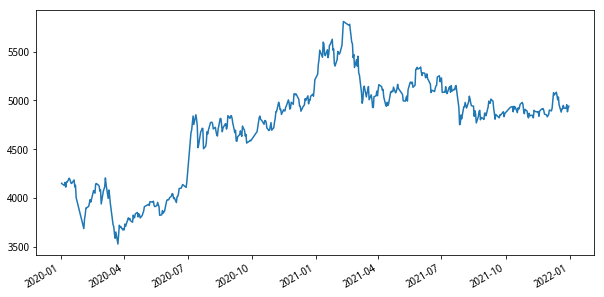

In [17]:
# 获取收盘价和成交量日线图
df = get_price(code, 
               start_date=start_date, 
               end_date=end_date, 
               frequency='daily', 
               fields=['close'],
               skip_paused=False, 
               fq='pre'
              )
df['close'].plot()

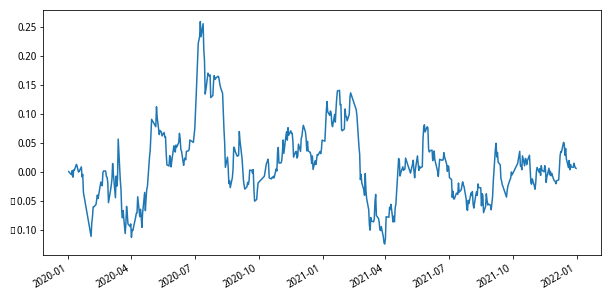

In [18]:
df['vol30'] = df['close'].rolling(30, min_periods=1).agg(lambda x: (x[-1]-x[0])/x[0])
df['vol30'].plot()

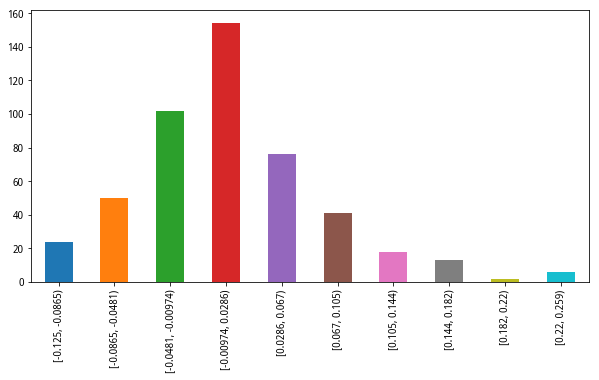

In [19]:
pinshu=pd.cut(df['vol30'].values,10,right=False).value_counts()
pinshu.plot(kind='bar')

In [20]:
pinshu_df=pd.DataFrame(pinshu,columns=['频数'])
pinshu_df['频率f']=pinshu_df / pinshu_df['频数'].sum()
pinshu_df['累计频率f']=pinshu_df['频率f'].cumsum()
pinshu_df['频率%']=pinshu_df['频率f'].map(lambda x:'%.2f%%'%(x*100))
pinshu_df['累计频率%']=pinshu_df['累计频率f'].map(lambda x:'%.4f%%'%(x*100))
pinshu_df

,频数,频率f,累计频率f,频率%,累计频率%
"[-0.125, -0.0865)",24,0.049383,0.049383,4.94%,4.9383%
"[-0.0865, -0.0481)",50,0.102881,0.152263,10.29%,15.2263%
"[-0.0481, -0.00974)",102,0.209877,0.362140,20.99%,36.2140%
"[-0.00974, 0.0286)",154,0.316872,0.679012,31.69%,67.9012%
"[0.0286, 0.067)",76,0.156379,0.835391,15.64%,83.5391%
"[0.067, 0.105)",41,0.084362,0.919753,8.44%,91.9753%
"[0.105, 0.144)",18,0.037037,0.956790,3.70%,95.6790%
"[0.144, 0.182)",13,0.026749,0.983539,2.67%,98.3539%
"[0.182, 0.22)",2,0.004115,0.987654,0.41%,98.7654%
"[0.22, 0.259)",6,0.012346,1.000000,1.23%,100.0000%


In [8]:
import pandas as pd
import numpy as np

# 模拟数据
data = pd.DataFrame({'price': np.random.randn(1000), 
                     'amount': 100*np.random.randn(1000)})

# 等分价格为10个区间
quartiles = pd.cut(data.price, 10)

# 定义聚合函数
def get_stats(group):
    return {'amount': group.sum()}

# 分组统计
grouped = data.amount.groupby(quartiles)
price_bucket_amount = grouped.apply(get_stats).unstack()

In [9]:
price_bucket_amount

,amount
price,
"(-3.186, -2.56]",-223.167899
"(-2.56, -1.94]",-52.444795
"(-1.94, -1.32]",-16.376077
"(-1.32, -0.699]",-608.569563
"(-0.699, -0.0793]",1140.918978
"(-0.0793, 0.541]",2381.965932
"(0.541, 1.161]",-1406.562383
"(1.161, 1.781]",-1661.673005
"(1.781, 2.401]",509.944317


In [23]:
window = 21  # trading days in rolling window
dpy = 252  # trading days per year
ann_factor = dpy / window

df['log_rtn'] = np.log(df['close']).diff()

# Var Swap (returns are not demeaned)
df['real_var'] = np.square(df['log_rtn']).rolling(window).sum() * ann_factor
df['real_vol'] = np.sqrt(df['real_var'])

# Classical (returns are demeaned, dof=1)
df['real_var'] = df['log_rtn'].rolling(window).var() * ann_factor
df['real_vol'] = np.sqrt(df['real_var'])

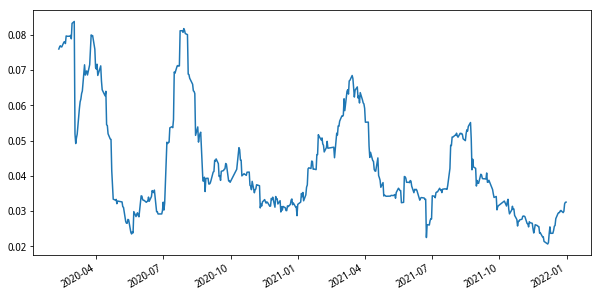

In [24]:
df['real_vol'].plot()